#### Latent Dirichlet Allocation (LDA)를 이용한 뉴스 데이터 클러스터링
sklearn 패키지를 이용한다.

In [2]:
import numpy as np
import re
import pickle
from nltk.corpus import stopwords
#from sklearn.datasets import fetch_20newsgroups

In [3]:
#newsData = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

In [32]:
#with open('./data/news.data', 'wb') as f:
#    pickle.dump(newsData , f, pickle.HIGHEST_PROTOCOL)

In [4]:
with open('./data/news.data', 'rb') as f:
    newsData  = pickle.load(f)

In [5]:
news = newsData.data
print(len(news))
print(news[0])

11314
Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atrocities.
	What is a shame is that in Austria, daily reports of
the inhuman acts commited by Israeli soldiers and the blessing
received from the Government makes some of the Holocaust guilt
go away. After all, look how the Jews are treating other races
when they got power. It is unfortunate.



In [6]:
print(newsData.target_names)
print(len(newsData.target_names))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
20


#### preprocessing
영문자가 아닌 문자를 제거한다.

In [7]:
news1 = []
for doc in news:
    news1.append(re.sub("[^a-zA-Z]", " ", doc))

불용어를 제거하고, 모든 단어를 소문자로 변환하고, 길이가 3 이하인 단어를 제거한다.

In [8]:
stop_words = stopwords.words('english')
news2 = []
for doc in news1:
    doc1 = []
    for w in doc.split():
        w = w.lower()
        if len(w) > 3 and w not in stop_words:
            doc1.append(w)
    news2.append(' '.join(doc1))

In [9]:
print(news2[0])

well sure story seem biased disagree statement media ruin israels reputation rediculous media israeli media world lived europe realize incidences described letter occured media whole seem ignore subsidizing israels existance europeans least degree think might reason report clearly atrocities shame austria daily reports inhuman acts commited israeli soldiers blessing received government makes holocaust guilt away look jews treating races power unfortunate


#### TF-IDF matrix 생성

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
tf_vector = TfidfVectorizer(max_features = 500)

In [12]:
tfidf = tf_vector.fit_transform(news2)

In [13]:
print(tfidf.shape)
#print(tfidf[0].toarray()[0])

(11314, 500)


In [14]:
vocab = tf_vector.get_feature_names()

In [15]:
print(vocab[:20])

['able', 'access', 'actually', 'address', 'advance', 'agree', 'allow', 'almost', 'already', 'also', 'although', 'always', 'american', 'among', 'anonymous', 'another', 'answer', 'anti', 'anybody', 'anyone']


#### Latent Dirichlet Allocation (LDA)

In [16]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [18]:
model = LDA(n_components = len(newsData.target_names), learning_method='online', 
            evaluate_every=5, max_iter=100, verbose=1)   #학습방법은 batch / online(그때 그때 작업) 중 선택
                        #target_name=20개로 한정,  verbose : 상황 보여줘

#### Fitting and transform
- Return 값이 Document-Topic distribution이다.
- iteration 횟수가 max_iter까지 가면 아직 수렴하지 않은 것이다.
- 아직 수렴하지 않은 경우 mat_iter를 증가시켜야 한다.
- mat_iter를 증가시켜도 수렴하지 못하는 경우는 preprocessing 등을 좀 더 정밀하게 해야 한다.
- perplexity(내부 평가 지표)는 감소해야 한다.

In [19]:
#lsa의 U에 해당
doc_topic = model.fit_transform(tfidf)
doc_topic.shape
#(수렴안함)

iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100, perplexity: 1560.9814
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 1565.6185
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100, perplexity: 1565.8587
iteration: 16 of max_iter: 100
iteration: 17 of max_iter: 100
iteration: 18 of max_iter: 100
iteration: 19 of max_iter: 100
iteration: 20 of max_iter: 100, perplexity: 1569.6092
iteration: 21 of max_iter: 100
iteration: 22 of max_iter: 100
iteration: 23 of max_iter: 100
iteration: 24 of max_iter: 100
iteration: 25 of max_iter: 100, perplexity: 1571.1352
iteration: 26 of max_iter: 100
iteration: 27 of max_iter: 100
iteration: 28 of max_iter: 100
iteration: 29 of max_iter:

(11314, 20)

#### Topic-Term distribution

In [21]:
#어떤 단어가 어느 주제에 많이 있나에 대한 분포

topic_term = model.components_ 
topic_term.shape
#(주제(토픽), 워드)

(20, 500)

#### Topic별로 문서 분류
doc_topic 행렬에서 가장 큰 colume을 선택한다. Colume에 topic의 score가 부여돼 있다.

In [22]:
doc_topic[0:1, :]#문서 1에서 눈에 띄게 큰 17번째 값 주목
# LSA : - 값에 대한 의문? 왜나오는가(모호)----->LSD는 이러한 모호함 X 다들 양수

array([[0.01044057, 0.1126237 , 0.01044057, 0.01044057, 0.01044057,
        0.01044057, 0.01044057, 0.01044057, 0.01044057, 0.01044057,
        0.01044057, 0.01044057, 0.01044057, 0.01044057, 0.17293108,
        0.01044057, 0.01044057, 0.01044057, 0.01044057, 0.5369555 ]])

In [23]:
for i in range(10):
    print('문서-{:d} : topic = {:d}'.format(i+1, np.argmax(doc_topic[i:(i+1), :][0])+1))
             # ex) 0: 1까지 = 0을 읽겠다(하나씩 읽겠다), : 끝까지!, [0]=2차원이니까 차원 축소,  사람이 보게 +1 !   
# 큰 값에 해당시켜 나열

문서-1 : topic = 20
문서-2 : topic = 16
문서-3 : topic = 16
문서-4 : topic = 5
문서-5 : topic = 16
문서-6 : topic = 16
문서-7 : topic = 20
문서-8 : topic = 20
문서-9 : topic = 17
문서-10 : topic = 20


#### topic_term 행렬에서 topic 별로 중요 단어를 표시한다

In [24]:
len(topic_term)

20

In [25]:
for i in range(len(topic_term)):
    idx = np.flipud(topic_term[i].argsort())[:10] #flipud : 배열 위 아래로 뒤집기 (순서 바꾸기)
                                                #argsort() : 오름차 순으로 번호매김
    print('토픽-{:2d} : '.format(i+1), end='')
    for n in idx:
        print('{:s} '.format(vocab[n]), end='')
    print()

토픽- 1 : back phone remember internet rather little difference either actually whatever 
토픽- 2 : send wrong copy answer group apple lost mean must take 
토픽- 3 : window driver using program motif line work widget application mode 
토픽- 4 : article model color runs seen come three done hear tried 
토픽- 5 : drive file windows files graphics price disk would system software 
토픽- 6 : thanks please mail anyone know looking advance information help could 
토픽- 7 : card video monitor drivers info windows called hardware anyone directory 
토픽- 8 : speed sound high test love going memory works different running 
토픽- 9 : team players hockey league best water season currently matter used 
토픽-10 : would think good like might well something know really heard 
토픽-11 : anybody david part like home city read problems today cause 
토픽-12 : game games play season soon posting team first sorry second 
토픽-13 : space right subject course long original around keep years short 
토픽-14 : sale offer bike stuff sell gr

In [39]:
#flipud , argsort 활용법

a=np.array([0.7,0.3,0.8])
b=a.argsort()
print(b) #1번 단어가 가장 영향력 적다. 0.8이 가장 가능성 있다
np.flipud(b) #1차원이면 양옆으로만 뒤집

[1 0 2]


array([2, 0, 1], dtype=int64)

In [26]:
topic_word_dist = model.components_ / model.components_.sum(axis=1)[:, np.newaxis]

In [27]:
np.sum(topic_word_dist[0])

1.0

In [ ]:
s=topic_term / np sum(topic.axis=1) # axis=1 : 가로로 다 더해

<BarContainer object of 500 artists>

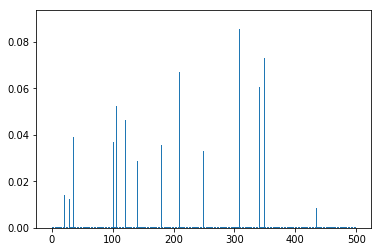

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(np.arange(0, 500), topic_word_dist[0:1,:][0]) #2개의 토픽이 걸쳐있는 모양새

In [34]:
model.components_.sum(axis=1)[:, np.newaxis]

array([[ 745.86249886],
       [ 293.81219977],
       [ 343.10428028],
       [ 313.96405056],
       [ 802.99493552],
       [ 737.16285278],
       [1990.50135305],
       [ 168.61621857],
       [ 463.46760886],
       [ 271.56628326],
       [4264.59087949],
       [4071.62634714],
       [ 261.14297574],
       [ 402.96728601],
       [ 275.87422421],
       [7442.00056366],
       [7648.76144539],
       [3585.79989254],
       [ 513.26484123],
       [4429.23743516]])

In [35]:
x = np.arange(10)
x[:, np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [36]:
x.reshape(10,1)

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])